Saving mask.png to mask (8).png
Saving texture.png to texture (8).png
IoU: 0.3577
Dice Coefficient: 0.5269


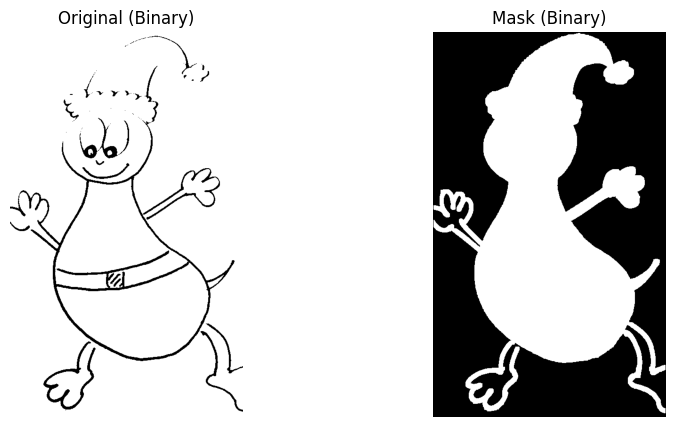

In [13]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Upload files
uploaded = files.upload()

# Extract file names for processing
mask_path = list(uploaded.keys())[0]  # First uploaded file (assume mask)
texture_path = list(uploaded.keys())[1]  # Second uploaded file (assume texture)

# Load the uploaded images
mask = cv2.imdecode(np.frombuffer(uploaded[mask_path], np.uint8), cv2.IMREAD_GRAYSCALE)
original = cv2.imdecode(np.frombuffer(uploaded[texture_path], np.uint8), cv2.IMREAD_GRAYSCALE)

# Check if the images loaded successfully
if mask is None:
    print(f"Error: '{mask_path}' could not be loaded.")
if original is None:
    print(f"Error: '{texture_path}' could not be loaded.")

# Resize the mask to match the dimensions of the original image
if mask is not None and original is not None:
    mask_resized = cv2.resize(mask, (original.shape[1], original.shape[0]))

    # Binarize both images (thresholding)
    _, mask_bin = cv2.threshold(mask_resized, 127, 1, cv2.THRESH_BINARY)
    _, original_bin = cv2.threshold(original, 127, 1, cv2.THRESH_BINARY)

    # IoU Calculation
    def calculate_iou(ground_truth, predicted):
        intersection = np.logical_and(ground_truth, predicted).sum()
        union = np.logical_or(ground_truth, predicted).sum()
        return intersection / union if union > 0 else 0

    # Dice Coefficient Calculation
    def calculate_dice(ground_truth, predicted):
        intersection = np.logical_and(ground_truth, predicted).sum()
        dice = (2 * intersection) / (ground_truth.sum() + predicted.sum())
        return dice if (ground_truth.sum() + predicted.sum()) > 0 else 0

    # Calculate metrics
    iou = calculate_iou(original_bin, mask_bin)
    dice = calculate_dice(original_bin, mask_bin)

    print(f"IoU: {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")

    # Display both binary images for verification
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_bin, cmap='gray')
    plt.title("Original (Binary)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_bin, cmap='gray')
    plt.title("Mask (Binary)")
    plt.axis("off")

    plt.show()